In [7]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/heart.csv')

In [8]:
df = df.dropna()
df=pd.get_dummies(df,columns=['Sex','AHD','ChestPain','Thal','AHD'])

In [9]:
y=df['AHD_Yes']
X=df.drop(columns=['AHD_No','AHD_Yes'])

In [10]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
kfold=KFold(n_splits=5, shuffle=True)
for i in range(2,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    result=cross_validate(X=X,y=y,cv=kfold,scoring=['accuracy','roc_auc'],estimator=knn)
    print(i, result['test_accuracy'].mean(), result['test_roc_auc'].mean())

2 0.5759322033898305 0.6154505717955155
3 0.649774011299435 0.657472821921209
4 0.6263841807909605 0.6950242101917978
5 0.6770056497175141 0.6954006366730197
6 0.6701694915254237 0.7087270560996485
7 0.6833333333333333 0.7256007098551804
8 0.616271186440678 0.6608298404658415
9 0.63954802259887 0.7350695050577156
10 0.6563276836158193 0.6973648741105638
11 0.6733333333333333 0.6981842359346253
12 0.659774011299435 0.7076252315482793
13 0.6636723163841808 0.7116706509216589
14 0.6565536723163842 0.7065669208505415
15 0.6568926553672316 0.7090978256997589
16 0.6733333333333333 0.7256675070273978
17 0.6528813559322034 0.6940665331223862
18 0.6567231638418078 0.7122865233489886
19 0.6704519774011299 0.7246092402494585
20 0.6831073446327685 0.719775478215354
21 0.6732203389830509 0.740608422056253
22 0.6700564971751413 0.7251961177912266
23 0.6903389830508474 0.7217658941630456
24 0.6771186440677966 0.7025093604781105
25 0.6297740112994351 0.7030687540410762
26 0.6836158192090396 0.73385265

## After Scaling

In [11]:
X_norm=(X-X.mean())/X.std()
X_norm

,Age,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Sex_0,Sex_1,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,0.934603,0.749116,-0.275978,2.426332,1.008496,0.017465,-0.695246,1.067164,2.260330,-0.720760,-0.689930,0.689930,-0.955534,-0.621727,-0.443751,3.445712,3.930370,-1.108572,-0.793562
1,1.376605,1.593577,0.743301,-0.410757,1.008496,-1.813274,1.433497,0.381130,0.642696,2.474249,-0.689930,0.689930,1.043012,-0.621727,-0.443751,-0.289239,-0.253572,0.899025,-0.793562
2,1.376605,-0.658320,-0.352904,-0.410757,1.008496,-0.897904,1.433497,1.324427,0.642696,1.409246,-0.689930,0.689930,1.043012,-0.621727,-0.443751,-0.289239,-0.253572,-1.108572,1.255898
3,-1.938409,-0.095345,0.050961,-0.410757,-1.001728,1.630258,-0.695246,2.096215,2.260330,-0.720760,-0.689930,0.689930,-0.955534,1.603007,-0.443751,-0.289239,-0.253572,0.899025,-0.793562
4,-1.496407,-0.095345,-0.833696,-0.410757,1.008496,0.976423,-0.695246,0.295376,-0.974938,-0.720760,1.444542,-1.444542,-0.955534,-0.621727,2.245926,-0.289239,-0.253572,0.899025,-0.793562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.271600,0.467629,-0.122124,-0.410757,-1.001728,-1.159438,1.433497,-0.733675,0.642696,-0.720760,1.444542,-1.444542,1.043012,-0.621727,-0.443751,-0.289239,-0.253572,-1.108572,1.255898
298,-1.054405,-1.221294,0.320204,-0.410757,-1.001728,-0.767137,-0.695246,0.123867,0.642696,-0.720760,-0.689930,0.689930,-0.955534,-0.621727,-0.443751,3.445712,-0.253572,-1.108572,1.255898
299,1.487106,0.692818,-1.045244,2.426332,-1.001728,-0.374836,-0.695246,2.010461,0.642696,1.409246,-0.689930,0.689930,1.043012,-0.621727,-0.443751,-0.289239,-0.253572,-1.108572,1.255898
300,0.271600,-0.095345,-2.237607,-0.410757,-1.001728,-1.508150,1.433497,0.123867,0.642696,0.344243,-0.689930,0.689930,1.043012,-0.621727,-0.443751,-0.289239,-0.253572,-1.108572,1.255898


In [14]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
kfold=KFold(n_splits=5, shuffle=True)

train_accuracy=[]
test_accuracy=[]
for i in range(2,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_norm,y)
    result=cross_validate(X=X_norm,y=y,cv=kfold,
                          scoring=['accuracy','roc_auc'],
                          estimator=knn,
                          return_train_score=True)
    print(i, result['test_accuracy'].mean(), result['test_roc_auc'].mean())
    train_accuracy.append(result['train_accuracy'].mean())
    test_accuracy.append(result['test_accuracy'].mean())

2 0.7644632768361581 0.8223902661064425
3 0.7776836158192092 0.8504165419840106
4 0.7977966101694915 0.8748742654572628
5 0.7776836158192091 0.8694333886837636
6 0.7948022598870057 0.8627199927199927
7 0.8148587570621469 0.8768073919639138
8 0.8149717514124294 0.8786223876961297
9 0.8180225988700565 0.9049196925154934
10 0.8147457627118644 0.8876406471526124
11 0.8417514124293785 0.8981731066579155
12 0.8213559322033899 0.8963883053221288
13 0.8280225988700565 0.8969698939246701
14 0.8385310734463276 0.9006949558178018
15 0.8385310734463276 0.8972656972068984
16 0.8416949152542375 0.9050546923141635
17 0.8147457627118644 0.8924289782662876
18 0.8313559322033898 0.9014727115672609
19 0.8348587570621469 0.904499019656404
20 0.8111299435028249 0.9043545751633987
21 0.8249152542372882 0.8954560883750868
22 0.8351412429378531 0.9029853370322709
23 0.8315819209039548 0.9005557396966152
24 0.8484745762711864 0.9143300731403672
25 0.8214124293785311 0.9080303358190704
26 0.8215819209039548 0.9

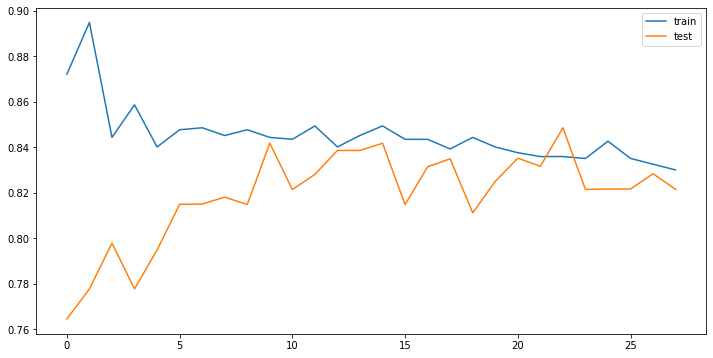

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(train_accuracy, label='train')
plt.plot(test_accuracy, label='test')
plt.legend()